
___
# Recommender System with Python

Welcome to my simple Recommender Systems with Python.

In this notebook, I will focus on providing a basic recommendation system by suggesting movies that are most similar to each other. The Recommender system takes an input (movie name) and recommends other movies that are similar based on user ratings.


## Import Libraries

In [227]:
import numpy as np
import pandas as pd

## Get the Data

In [ ]:
val = input("Enter your value: ") 
print(val)

In [228]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep='\t', names=column_names)

In [229]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


Getting the movie titles:

In [230]:
movie_titles = pd.read_csv("Movie_Id_Titles")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


merging them together:

In [231]:
df = pd.merge(df,movie_titles,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


# EDA

Some exploratory data analysis

## Visualization Imports

In [232]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Creating a ratings dataframe with average rating and number of ratings:

In [233]:
avg_rating=df[['title','rating']].groupby('title').mean().sort_values(by='rating',ascending=False)



In [234]:
avg_rating.rename(columns={"rating": "Average Rating"},inplace=True)
avg_rating.head()


,Average Rating
title,
They Made Me a Criminal (1939),5.0
Marlene Dietrich: Shadow and Light (1996),5.0
"Saint of Fort Washington, The (1993)",5.0
Someone Else's America (1995),5.0
Star Kid (1997),5.0


In [235]:
count_rating=df[['title','rating']].groupby('title').count().sort_values(by='rating',ascending=False)



In [236]:
count_rating.rename(columns={'rating':'Number of Ratings'},inplace=True)

In [237]:
count_rating.head()

,Number of Ratings
title,
Star Wars (1977),584
Contact (1997),509
Fargo (1996),508
Return of the Jedi (1983),507
Liar Liar (1997),485


In [238]:
ratings=pd.merge(avg_rating,count_rating, how='inner',on='title')
ratings.head()


,Average Rating,Number of Ratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3


ranking the movies based on the Number of Ratings

In [239]:
ratings.sort_values(by='Number of Ratings',ascending=False)

,Average Rating,Number of Ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
Land and Freedom (Tierra y libertad) (1995),3.000000,1
"Big One, The (1997)",3.000000,1
Cyclo (1995),3.000000,1


In [241]:
ratings.loc['1-900 (1994)']

Average Rating       2.6
Number of Ratings    5.0
Name: 1-900 (1994), dtype: float64

Histograms:

Text(0, 0.5, 'Count')

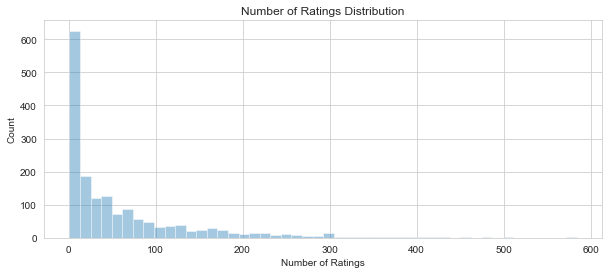

In [242]:
#plt.figure(figsize=(10,4))
#ratings['num of ratings'].hist(bins=70)
sns.set_style("whitegrid")
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(10,4))
axes1=sns.distplot(ratings['Number of Ratings'],kde=False)
axes1.set_title('Number of Ratings Distribution')
axes1.set_ylabel('Count')

There are a lot movies that have been watched by only a couple of users,this may skew our user rating. I will deal with this issue later in the workbook.

[Text(0, 0.5, 'Count'), Text(0.5, 1.0, 'Average Ratings Distribution')]

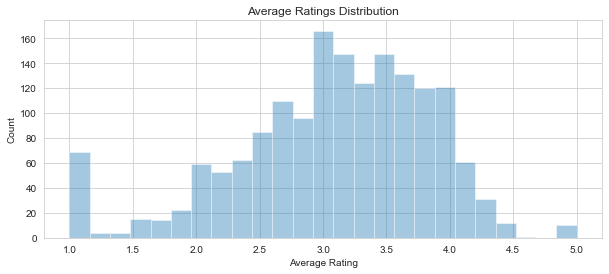

In [243]:
sns.set_style('whitegrid')
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(10,4))
axes2=sns.distplot(ratings['Average Rating'],kde=False)
axes2.set(ylabel='Count',title='Average Ratings Distribution')

#plt.figure(figsize=(10,4))
#ratings['rating'].hist(bins=70)

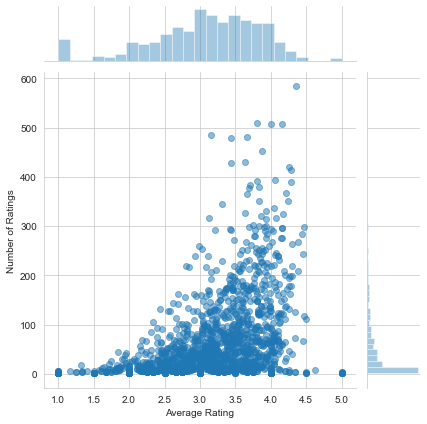

In [244]:
sns.jointplot(x='Average Rating',y='Number of Ratings',data=ratings,alpha=0.5)

As the number of ratings go up, the average rating also increases. This makes sense because people watch more movies that are better and therefore are more likely to give it a rating. On the other hand, movies that are not watched by many people are likely to be less good, and therefore have less ratings.

## Recommending Similar Movies

Creating a table where one axis will have all the movie titles and the other will have the user_id. The data will then be the rating that each user gave to each movie. There will be a lot of NaN values because not everyone has watched every movie.

In [245]:
moviemat=df.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Picking some movies to find recommendations for. I will do so by picking movies with high amount of ratings, as they are more familiar to everyone

In [246]:
ratings=ratings.sort_values('Number of Ratings',ascending=False)

Choosing two movies: starwars, a sci-fi movie. And Liar Liar, a comedy.

In [247]:
ratings.head()

,Average Rating,Number of Ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


Grabbing the user ratings for those two movies:

In [248]:
starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']


In [249]:
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

Using corrwith() method to get correlations between two pandas series:

In [250]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Removing Nan values:

In [251]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


Now if we sort the dataframe by correlation, we should get the most similar movies, however note that we get some results that don't really make sense. This is because there are movies where only a few users have both watched Star Wars and the other respective movie. For example Commandments and Star Wars have only been watched by 3 users. This skews our correlation.

In [253]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [ ]:
moviemat[(moviemat['Star Wars (1977)'] > 0) & (moviemat['Commandments (1997)']>0)][['Commandments (1997)','Star Wars (1977)']]

Filtering out movies that have less than 100 reviews (this value was chosen based off the histogram from earlier),
and then sorting the table based on correlation.

In [254]:
corr_starwars = corr_starwars.join(ratings['Number of Ratings'])


In [256]:
ratings.head()


Average Rating       2.6
Number of Ratings    5.0
Name: 1-900 (1994), dtype: float64

Now sort the values and notice how the titles make a lot more sense:

In [259]:
corr_starwars[corr_starwars['Number of Ratings']>100].sort_values(by='Correlation',ascending=False).head()

,Correlation,Number of Ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


Now the same for the comedy Liar Liar:

In [258]:
corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['Correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar = corr_liarliar.join(ratings['Number of Ratings'])
corr_liarliar[corr_liarliar['Number of Ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,Number of Ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
